## T12B model

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#good plots
plt.rcParams.update({'font.size': 18}) 
#plt.rc('font',size='18')

# General scan

In [42]:
#!/usr/bin/env python

import pyslha
import pyT12B_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

import NEUTRINO2018
import neutrino_analytic3

# Tiempo inicial
t1=time.time() 

#Open
xdict = pyT12B_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 1

for n in range(0,Num):
    
    Lanbda1 = 1.3e-1 #Warning
    L6 = 1.300000E-02
    
    mu31 = 1.01e6
    mu32 = 2.01e6
    mu33 = 1.01e8
    L71 = 1.01e-2
    L72 = 2.01e-2
    L73 = 3.01e-4
    
    MN = 101.0
    MPsi = 200.1
    Meta = 301.1
    l1 = 1.02e-2
    l2 = 2.01e-3
    y1 = 1.01e-2
    y2 = 2.1e-3
    
    # Modific the LesHouches         
    xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input' %Lanbda1     
    xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda61Input' %L6 
    xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda71Input' %L71   
    xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda72Input' %L72   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda73Input' %L73       
    xdict.blocks['MINPAR'].entries[8]='%.6E    # mu31Input' %mu31
    xdict.blocks['MINPAR'].entries[9]='%.6E    # mu32Input' %mu32
    xdict.blocks['MINPAR'].entries[10]='%.6E    # mu33Input' %mu33
        
    xdict.blocks['MNIN'].entries[1]='%.6E    # MN' %MN
    xdict.blocks['MR1IN'].entries[1]='%.6E    # Mr1' %MPsi
    xdict.blocks['MR2IN'].entries[1]='%.6E    # Mr2' %Meta
    xdict.blocks['YLR1IN'].entries[1]='%.6E    # YlR1' %l1
    xdict.blocks['YLR2IN'].entries[1]='%.6E    # YlR2' %l2
    xdict.blocks['YYR1IN'].entries[1]='%.6E    # YyR1' %y1
    xdict.blocks['YYR2IN'].entries[1]='%.6E    # YyR2' %y2

    
    ###  NEUTRINO EXPERIMENTAL VALUES ###################################################
    #phases of the PMNS matrix and the R 
    phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
    delta = phases1[0]
    eta1 = phases1[1]
    eta2 = phases1[2]
    #light neutrino masses (up 3 sigma range) NH (NO)
    #mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
    #Zero in this framework
    mnu1 = 1.0e-20
    mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1.0e-18+mnu1**2)
    mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1.0e-18+mnu1**2)
    #mixing angles (up 3 sigma range) NH
    t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
    t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
    t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))
    #Building PMNS matrix NH
    UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
    UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
    UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
    Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
    U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))
    #Defining the U elementes. readeable
    U11 = np.real(U[0,0])
    U12 = np.real(U[0,1])
    U13 = np.real(U[0,2])
    U21 = np.real(U[1,0])
    U22 = np.real(U[1,1])
    U23 = np.real(U[1,2])
    U31 = np.real(U[2,0])
    U32 = np.real(U[2,1])
    U33 = np.real(U[2,2])
    
    ### Algoritm to compute LAMBDAi elements
    vevSM = 246.5
    MS1 = np.sqrt(mu31 + 0.5*L71*vevSM**2)
    MS2 = np.sqrt(mu32 + 0.5*L72*vevSM**2)
    MS3 = np.sqrt(mu33 + 0.5*L73*vevSM**2)

    M1 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['M1']
    M2 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['M2']
    M3 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['M3']
    
    vv11 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V11']
    vv12 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V12']
    vv13 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V13']
    vv21 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V21']
    vv22 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V22']
    vv23 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V23']
    vv31 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V31']
    vv32 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V32']
    vv33 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['V33']
    uu11 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U11']
    uu12 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U12']
    uu13 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U13']
    uu21 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U21']
    uu22 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U22']
    uu23 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U23']
    uu31 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U31']
    uu32 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U32']
    uu33 = neutrino_analytic3.MATRIXCHIDIAG(vevSM, MN, MPsi, Meta, l1, l2, y1, y2)['U33']
    
    L1 = neutrino_analytic3.LAMBDA(M1,MS1,vv12,uu11)+ neutrino_analytic3.LAMBDA(M2,MS1,vv22,uu21)
    L2 = neutrino_analytic3.LAMBDA(M1,MS2,vv12,uu11)+ neutrino_analytic3.LAMBDA(M2,MS2,vv22,uu21)
    
    #####  ALGORITM: Particular case(see): inversion-neutrino-matrix.nb ######################
    a11 = 0.0
    a12 = 0.0 
    ### Random -> FREE PARAMETERS
    a21 = np.exp(np.random.uniform(np.log(10**(-6)),np.log(10**(0))))
    a22 = np.exp(np.random.uniform(np.log(10**(-6)),np.log(10**(0))))
    a31 = np.exp(np.random.uniform(np.log(10**(-6)),np.log(10**(0))))    
    a32 = np.exp(np.random.uniform(np.log(10**(-6)),np.log(10**(0))))

    b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
    b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
    b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
    b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
    b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
    b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)


    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.T12B_low',xdict)    
    
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoT12B LesHouches.in.T12B_low')    
    SPheno_output = subprocess.getoutput('cat SPheno.spc.T12B')
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fk')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fk')[1].split()[1])           
    mv2 = eval(SPheno_output.split('# Fk')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fk')[1].split()[9])  
    
    x.append([L6,mv1,mv2,mv3])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['L6','mv1','mv2','mv3'])

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")          

The program spent 0.15326142311096191 s running 1 times


In [38]:
xd

,L6,mv1,mv2,mv3
0,0.013,2.278064e-20,3.315525e-16,4.155577e-12


In [39]:
print(L1,L2)

-0.000107296997747 -6.16761872514e-05


In [43]:
SPheno_output.splitlines()

['# SUSY Les Houches Accord 2 - T12B Spectrum + Decays + Flavour Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.3  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.14.4  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop mass corrections to Higgs fields based on ',
 '#   M. D. Goods

$$ m_{s_i}^2 = \mu_{s_i}^2 + \dfrac{\lambda_{S_iH}}{2}v^2$$

In [28]:
MS1 = np.sqrt(mu31 + 0.5*L71*vevSM**2)
MS2 = np.sqrt(mu32 + 0.5*L72*vevSM**2)
MS3 = np.sqrt(mu33 + 0.5*L73*vevSM**2)
print(MS1,MS2,MS3)

1005.14021378 1417.96003491 10049.8760761


In [4]:

    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDFDM LesHouches.in.SDFDM_low')    
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDFDM')
    
    mCha = eval(SPheno_output.split('# Fv_3')[1].split()[1])
    mChi_1 = eval(SPheno_output.split('# Fv_3')[1].split()[5])
    mChi_2 = eval(SPheno_output.split('# Fv_3')[1].split()[9])
    mChi_3 = eval(SPheno_output.split('# Fv_3')[1].split()[13])
    
    
    # Run micromegas and take the relic density. 
    mo = subprocess.getoutput('~/Work/micromegas_5.0.8/SDFDM/./CalcOmega_with_D_Detection')#Only DM
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    
    ### Direct Detection: CDM#-nucleon cross sections[pb]
    PSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    NSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])

    x.append([MDF,Mn,YR1,YR2,mCha,mChi_1,mChi_2,mChi_3,Omega,PSI,NSI])    

The program spent 11.479670524597168 s running 10 times


In [5]:
xdnew = xd

In [6]:
#Concatenar files desde Jupyter

xd0 = pd.read_csv('xd_scan1.csv')
del xd0['Unnamed: 0']

xd = pd.concat([xd0, xdnew],ignore_index=True)

print(xd0.shape,xdnew.shape,xd.shape)

#save file
xd.to_csv('xd_scan1.csv')

(336, 11) (10, 11) (346, 11)


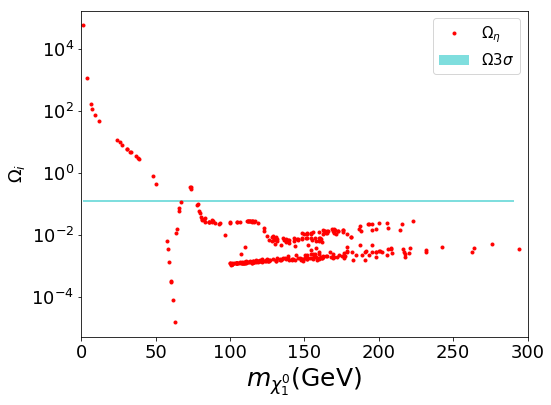

In [7]:
plt.figure(figsize=(8,6))

plt.semilogy( np.abs(xd.mChi_1), xd.Omega,'r.',label=r'$\Omega_{\eta}$',)

n=np.arange(1,3.e+2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='c',alpha=0.5,label=r'$\Omega 3\sigma$')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi_1^0}$(GeV)',size=25)
plt.ylabel(r'$\Omega_i$')
plt.xlim(0,300)

#plt.tight_layout()
plt.show()

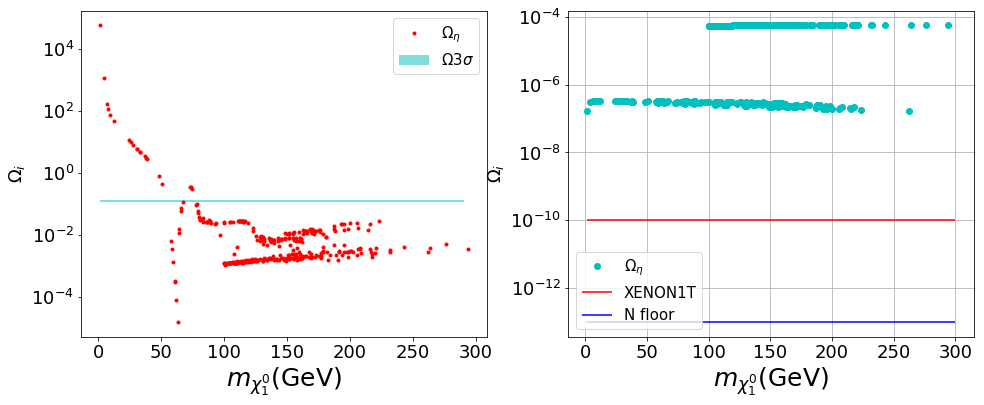

In [19]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.semilogy( np.abs(xd.mChi_1), xd.Omega,'r.',label=r'$\Omega_{\eta}$',)

n=np.arange(1,3.e+2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='c',alpha=0.5,label=r'$\Omega 3\sigma$')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi_1^0}$(GeV)',size=25)
plt.ylabel(r'$\Omega_i$')

plt.subplot(122)

plt.semilogy( np.abs(xd.mChi_1), xd.PSI,'co',label=r'$\Omega_{\eta}$',)
plt.hlines(1e-10,1,300,'r',label=r'XENON1T')
plt.hlines(1e-13,1,300,'b',label=r'N floor')
plt.grid()
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi_1^0}$(GeV)',size=25)
plt.ylabel(r'$\Omega_i$')

#plt.tight_layout()
plt.show()
